#### Уровень 1
##### Посчитать процент детей (младше 18 лет), соотношение мужчин и женщин на борту

In [124]:
import pandas as pd
df = pd.read_csv('titanic/train.csv')
df.info()
#Оценим кол-во пропусков
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Средний возраст пассажиров составляет 29.7 лет
Наиболее часто встречающийся возраст составляет 28.0 лет
Процент детей младше 18 лет (без заполнения порпусков) составил = 13 %
Процент детей младше 18 лет (с учетом заполнения пропусков) составил = 13 %
Соотношение мужчин и женщин на борту составило 1.84


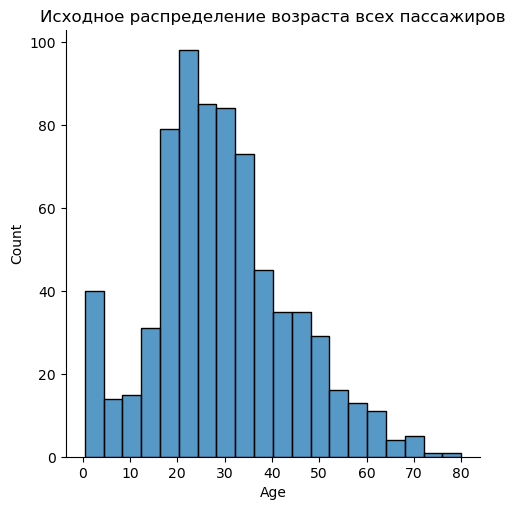

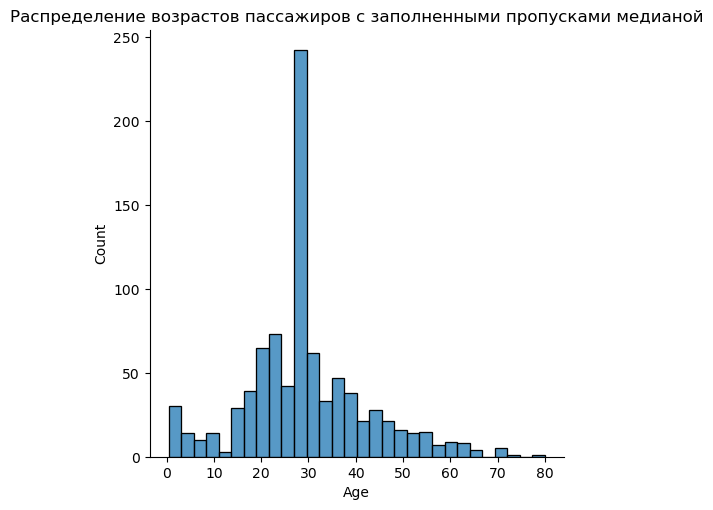

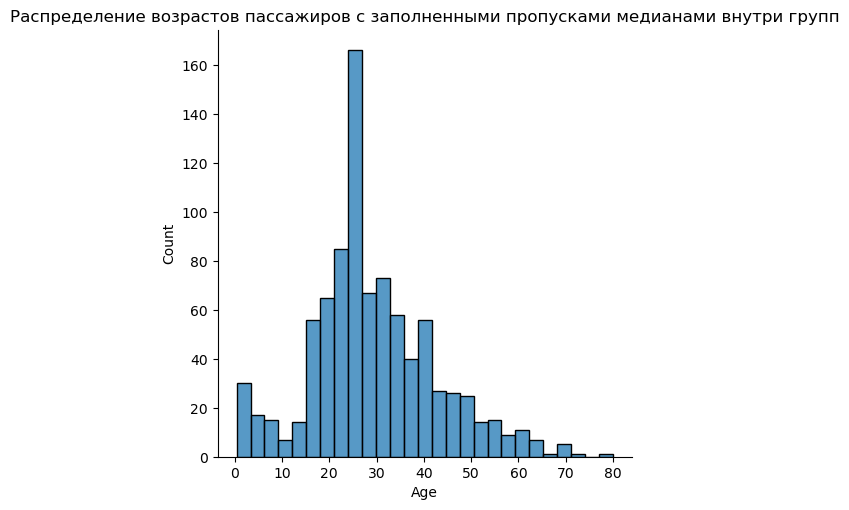

In [139]:
#Оценим медиану и среднее арифметическое
print('Средний возраст пассажиров составляет', df['Age'].mean().round(1), "лет")
print('Наиболее часто встречающийся возраст составляет', df['Age'].median(), "лет")

#Т.к. по заданию необходимо оценить процент детей младше 18 лет, а медианное значение 29 лет и пропуски
# в серии Age составляют менее 30 %, то можно посчитать % детей меньше 18 лет без учета заполнения пропусков:
child_per = round(100*len(df[df['Age'] < 18])/len(df))
print('Процент детей младше 18 лет (без заполнения порпусков) составил =', child_per, '%')

#Пробуем заполнить пропуски и сравнить с полученным значением. Если заполним пропуски Age только медианным 
#значением, то значительно исказится распределение, поэтоу разбиваем выборку на группы, где для каждой группы 
#находим медианное значение для заполнения

#Посмотрим на исходную гистограмму распределения возраста
import seaborn as sns
age_plt = sns.displot(data = df, x = df['Age']);
age_plt.set(title = 'Исходное распределение возраста всех пассажиров');

#Гистограмма, згде пропуски заполнены медианным значением
df_filled_med = df.copy()
df_filled_med['Age']=df_filled_med['Age'].fillna(df_filled_med['Age'].median())
age_med_plt = sns.displot(data = df_filled_med, x = df_filled_med['Age']);
age_med_plt.set(title = 'Распределение возрастов пассажиров с заполненными пропусками медианой')

#Гистограмма, где пропуски заполнены медианными значениями внутри групп
df_filled_gr = df.copy()
df_filled_gr['Age'] = df_filled_gr['Age'].fillna(df_filled_gr.groupby(['Sex', 'Pclass'])["Age"].transform('median'))
age_gr_plt = sns.displot(data = df_filled_gr, x = df_filled_gr['Age']);
age_gr_plt.set(title = 'Распределение возрастов пассажиров с заполненными пропусками медианами внутри групп')

#Видно, что в последней гистограмме не много одинакового значения медианы, но это не повлияло на рез-т:
child_per_gr = round(100*len(df_filled_gr[df_filled_gr['Age'] < 18])/len(df_filled_gr))
print('Процент детей младше 18 лет (с учетом заполнения пропусков) составил =', child_per_gr, '%')

df_w=df[df['Sex']=='female']
df_m=df[df['Sex']=='male']
print('Соотношение мужчин и женщин на борту составило', round((len(df_m)/len(df_w)),2))



#### Уровень 2
##### Посчитать по скольким людям нет информации (пола или возраста), вывести гистограмму по возрасту пассажиров, посчитать, какой процент мужчин и женщин выжили, какой процент детей выжили

In [142]:
df_NaN=df[df['Age'].isnull() | df['Sex'].isnull()]
print('Кол-во людей, по которым нет информации по полу или возрасту составляет', (len(df_NaN)), 'человек')

#Гистограммы приведены в Задании 1

df_w_S=df[(df['Sex']=='female') & (df['Survived']==1) & (df['Age']>=18)]
df_m_S=df[(df['Sex']=='male') & (df['Survived']==1) & (df['Age']>=18)]
df_c_S=df[(df['Age']<18) & (df['Survived']==1)]

df_w_all=df[(df['Sex']=='female') & (df['Age']>=18)]
df_m_all=df[(df['Sex']=='male') & (df['Age']>=18)]
df_c_all=df[df['Age']<18]

print('Выжили', (round(100*len(df_w_S)/len(df_w_all))), '% женщин')
print('Выжили', (round(100*len(df_m_S)/len(df_m_all))), '% мужчин') 
print('Выжили', (round(100*len(df_c_S)/len(df_c_all))), '% детей') 

Кол-во людей, по которым нет информации по полу или возрасту составляет 177 человек
Выжили 77 % женщин
Выжили 18 % мужчин
Выжили 54 % детей


#### Уровень 3
##### Сделав вывод по данным, написать простейшую модель, которая будет определять по входным данным, выжил ли человек. Проверить свою гипотезу на данных train.csv, оценить успешность модели. Прогнать модель на файле test.csv



In [145]:
#Воспользуемся датафреймом с заполненным возрастом из Задания 2
df_filled_gr

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.5,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [148]:
df_filled_gr.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.112424,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.304424,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,21.500000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,36.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


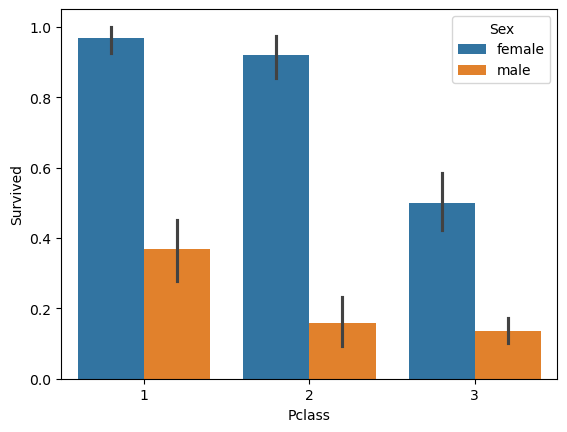

In [165]:
#Для определения по входным данным, выживет ли человек или нет, необходимо найти зависимость
#данного показателя от других признаков
sns.barplot(df_filled_gr, x='Pclass', y='Survived', hue='Sex');
#Из графика видно, что чем выше класс пассажира, тем больше его шанс выжить. 
#Также видим, что вероятнее выживает женщина.

Вероятнее всего выживет пассажир в возрасте 27.0 лет


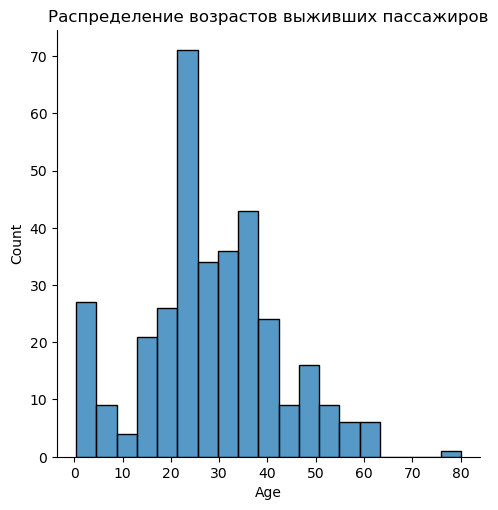

In [177]:
#Проверяем выживаемость людей по возрасту. Отфильтруем данные по выжившим и посмотрим статистику
df_filled_survived = df_filled_gr[df_filled_gr['Survived'] > 0]
print('Вероятнее всего выживет пассажир в возрасте', df_filled_survived['Age'].median(), "лет")
#Гистограмма по возрасту выживших с заполненными пропусками по группам медианами
df_filled_survived.loc[:,'Age'] = df_filled_survived['Age'].fillna(df_filled_survived.groupby(['Sex', 'Pclass'])["Age"].transform('median'))
age_surv_plt = sns.displot(data = df_filled_survived, x = df_filled_survived['Age']);
age_surv_plt.set(title = 'Распределение возрастов выживших пассажиров');

In [178]:
#Итого выводы для проверки заключений: 1. женщина, 2. 1 клсс, 3. 27 лет
df_test = pd.read_csv('titanic/test.csv')

In [179]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [180]:
#Добавим в датафрейм колонку выживания
df_test['Survived'] = 1
#Применим наши фильтры
df_test.loc[(df_test.Sex == 'male')&(df_test.Pclass == 3), 'Survived'] = 0
df_test.loc[(df_test.Sex == 'female')&(df_test.Pclass == 1), 'Survived'] = 1
df_test.loc[(df_test.Age<35)&(df_test.Age>25)&(df_test.Pclass == 1), 'Survived'] = 1
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Survived     418 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [182]:
#Загрузим датафрейм, с которой будем проверять
df_check = pd.read_csv('titanic/gender_submission.csv')

#Вычислим отклонение
df_check['errors'] = (df_test.Survived - df_check.Survived)**2
1 - df_check.errors.sum() / df_check.shape[0]
#В более чем 50% вариантов мы верно предсказали поведение модели.

0.7129186602870814